In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [81]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
df.shape

(7043, 21)

In [83]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [85]:
df["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Data is **midly imbalanced**= 73 : 27

In [86]:
df.drop(columns=['customerID'],inplace=True)

*Totalcharge data type is object but it should be integer or float*

*Seniorcitizen has two category named as 0 and 1 .so better uunderstanding convert into no and yes*

In [87]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [88]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*Since null value in  total charge feature  is very low we can ignore .*

*only 11 null value percentage in features Totalcharge  in too low(0.15%). so we can ignore it .*

In [89]:
df.dropna(how='any',inplace=True)

In [90]:
df.duplicated().sum()

np.int64(22)

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


*75% customers have tenure less than 55 months*

*Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month*

***UNIVARIATE ANALYSIS***

**ategorical Feature

In [92]:

categorical_columns = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [93]:
churn_df=df[df["Churn"]=="Yes"]

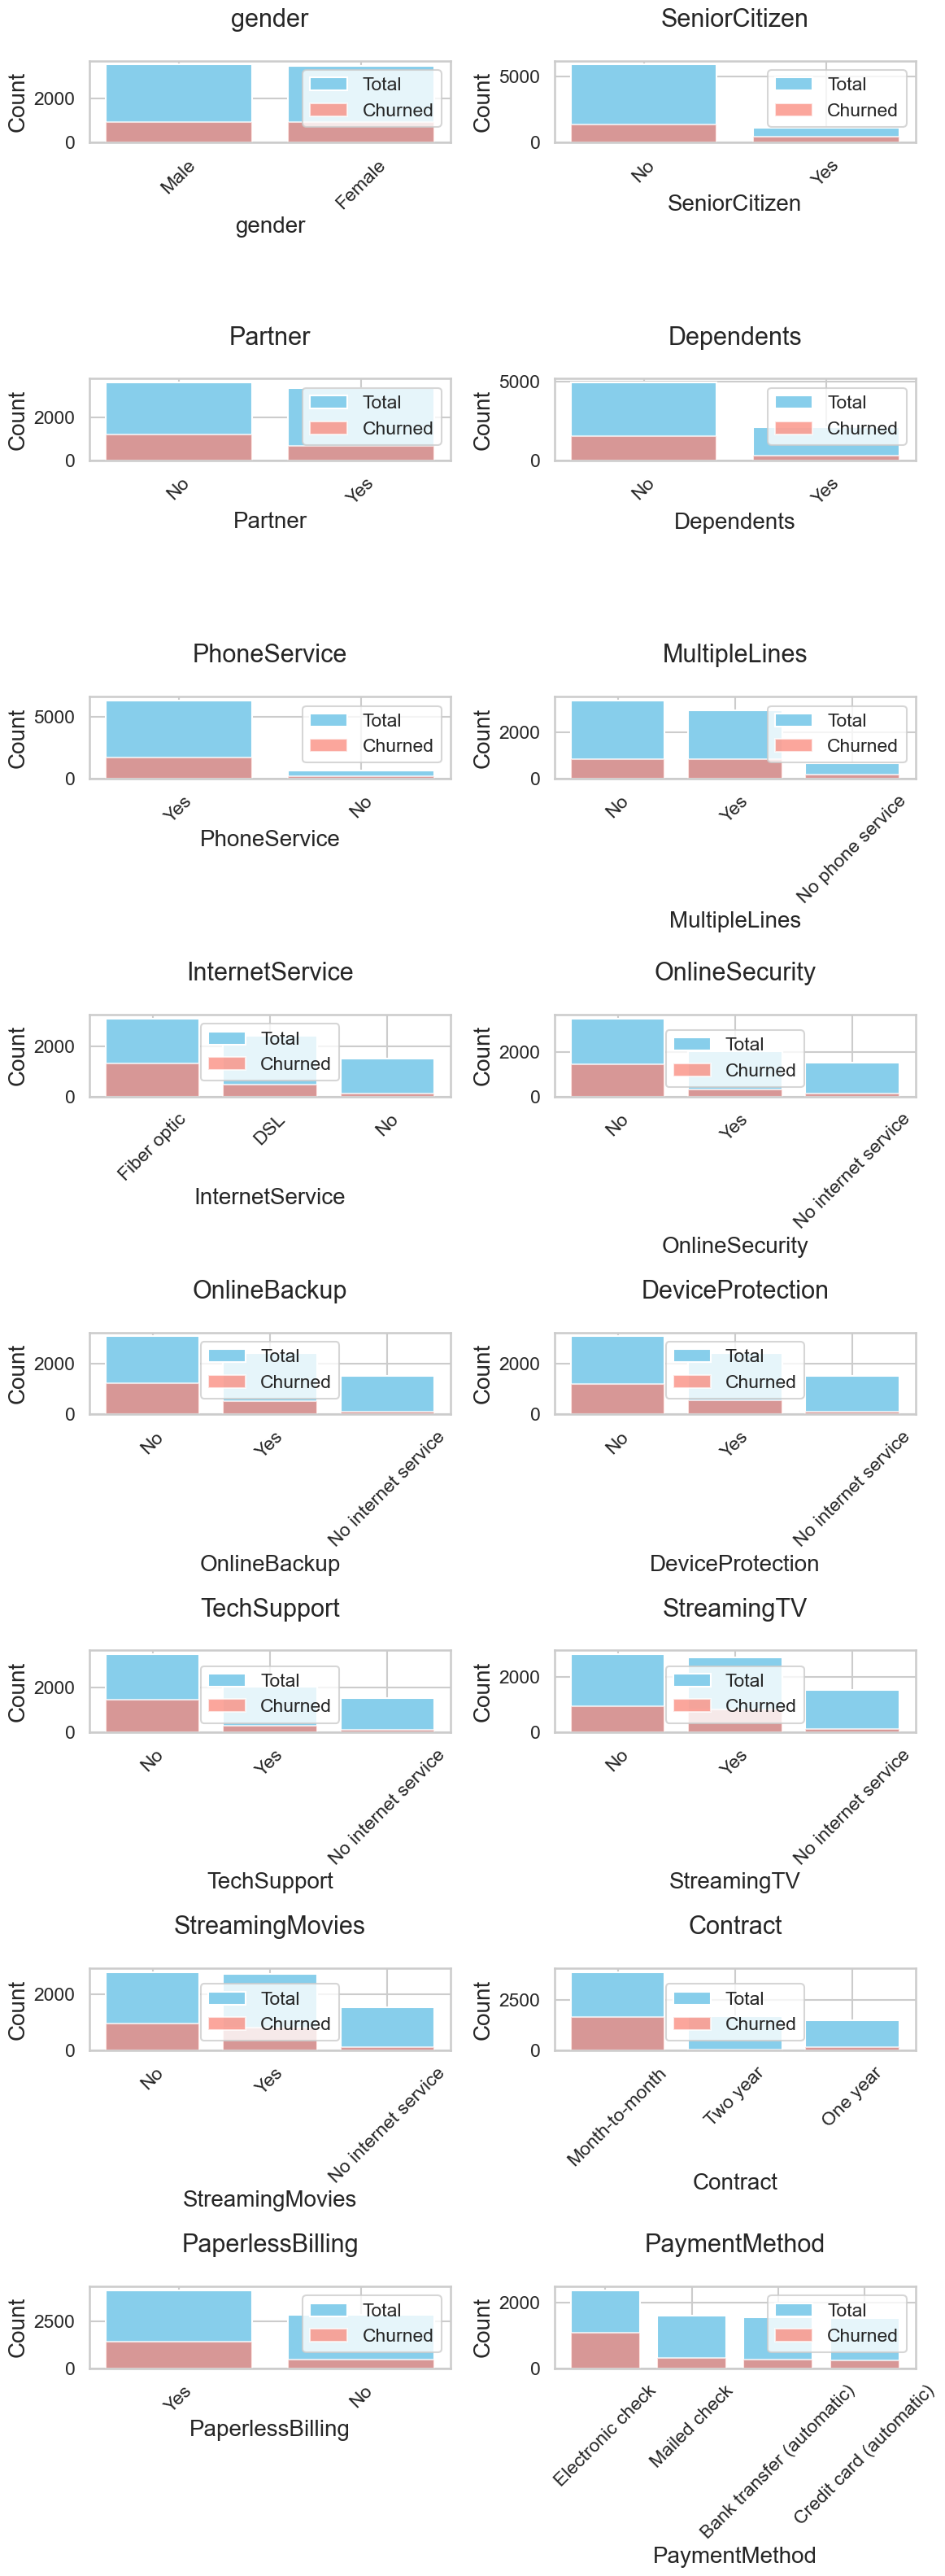

In [94]:


n_rows = (len(categorical_columns) + 1) // 2
plot_no=1
plt.figure(figsize=(12, n_rows * 4))
for col in categorical_columns:
    plt.subplot(n_rows, 2, plot_no)

    # Get value counts
    total = df[col].value_counts()
    churned = churn_df[col].value_counts()

    # Plot bars
    plt.bar(total.index, total.values, label='Total', color='skyblue')
    plt.bar(churned.index, churned.values, label='Churned', color='salmon', alpha=0.7)

    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plot_no +=1

plt.tight_layout()
plt.show()


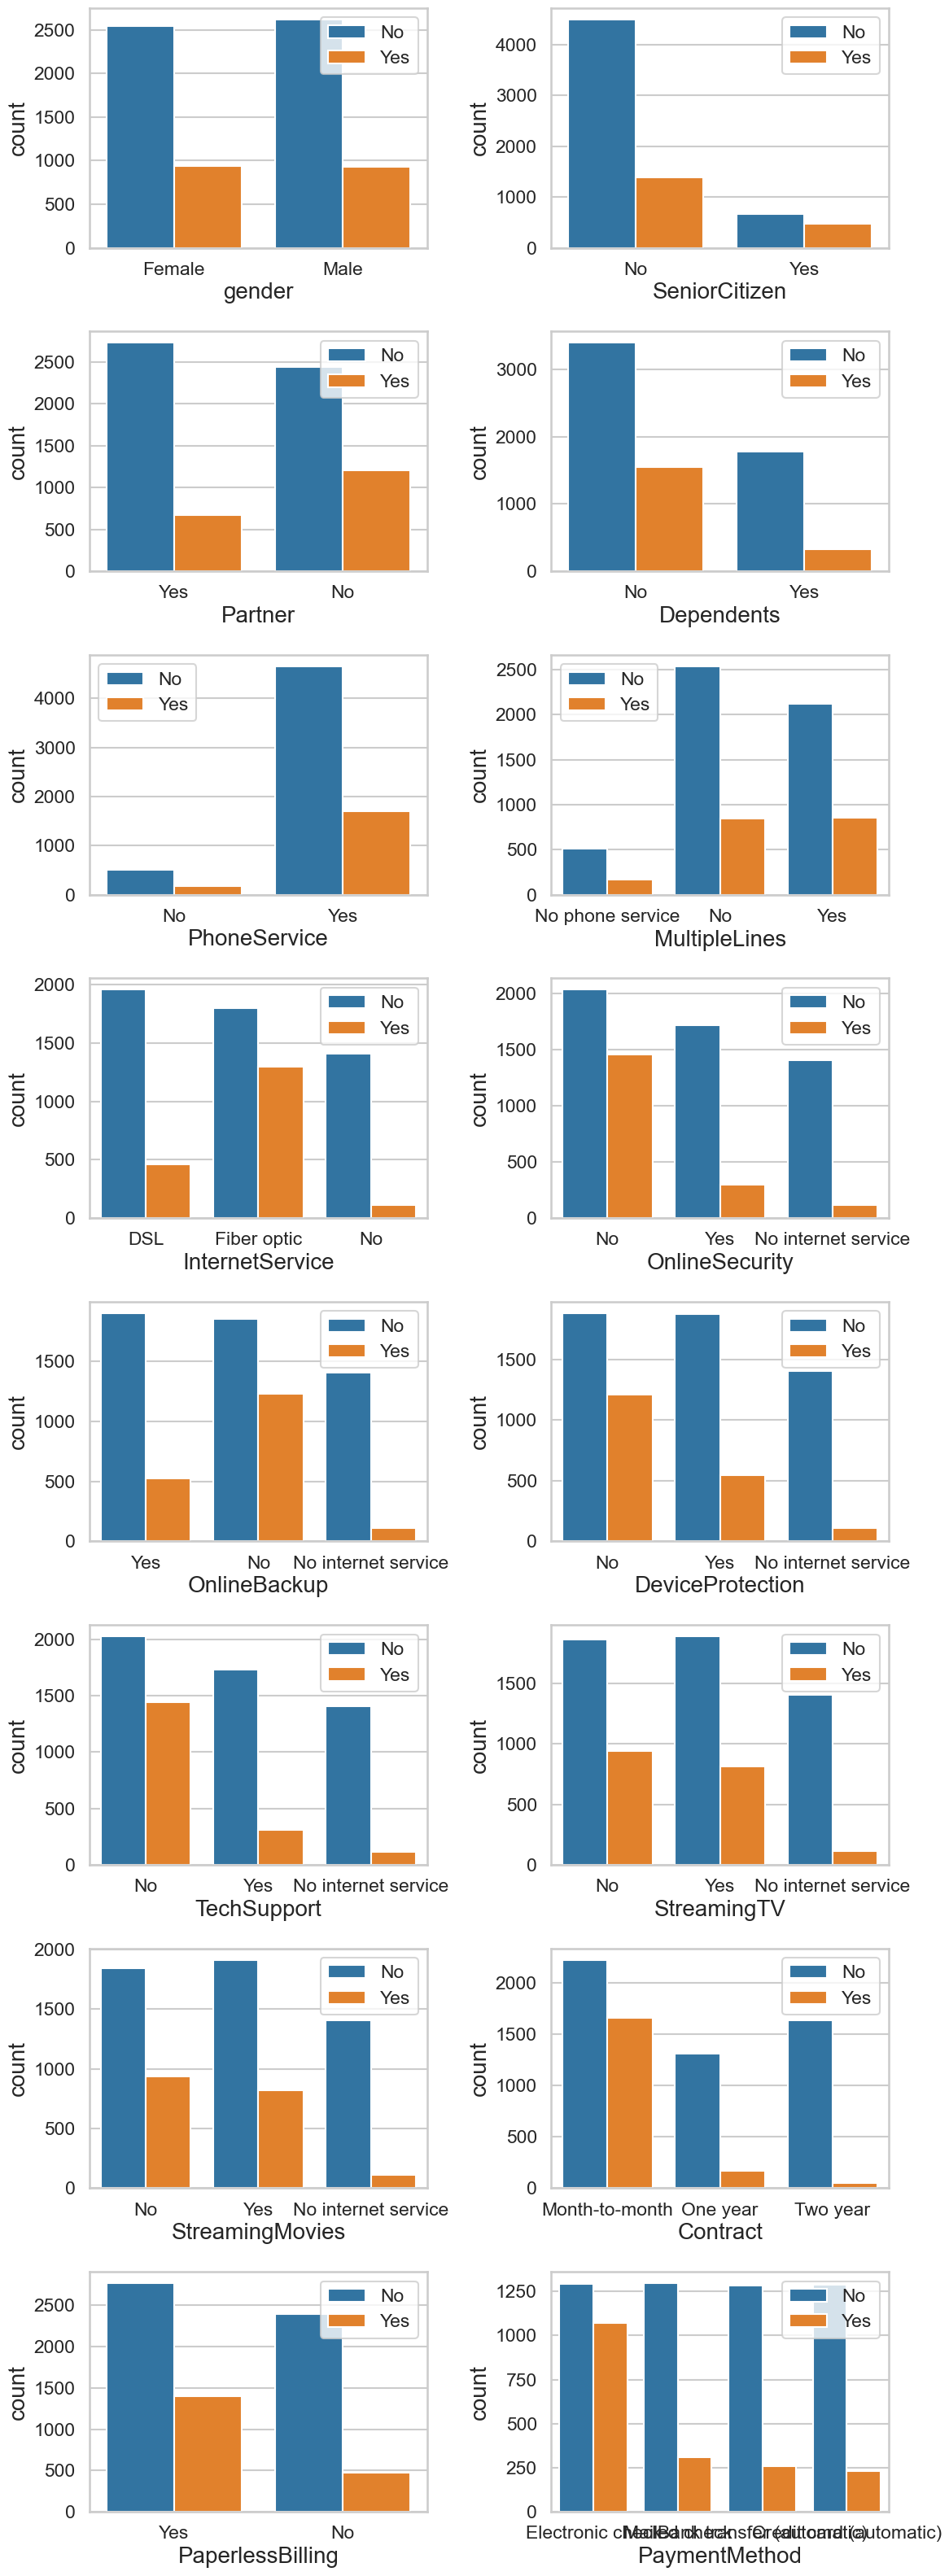

In [95]:
n_rows = (len(categorical_columns) + 1) // 2
plot_no=1
plt.figure(figsize=(12, n_rows * 4))
for col in categorical_columns:
    plt.subplot(n_rows, 2, plot_no)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.legend()
    plot_no +=1

plt.tight_layout()
plt.show()

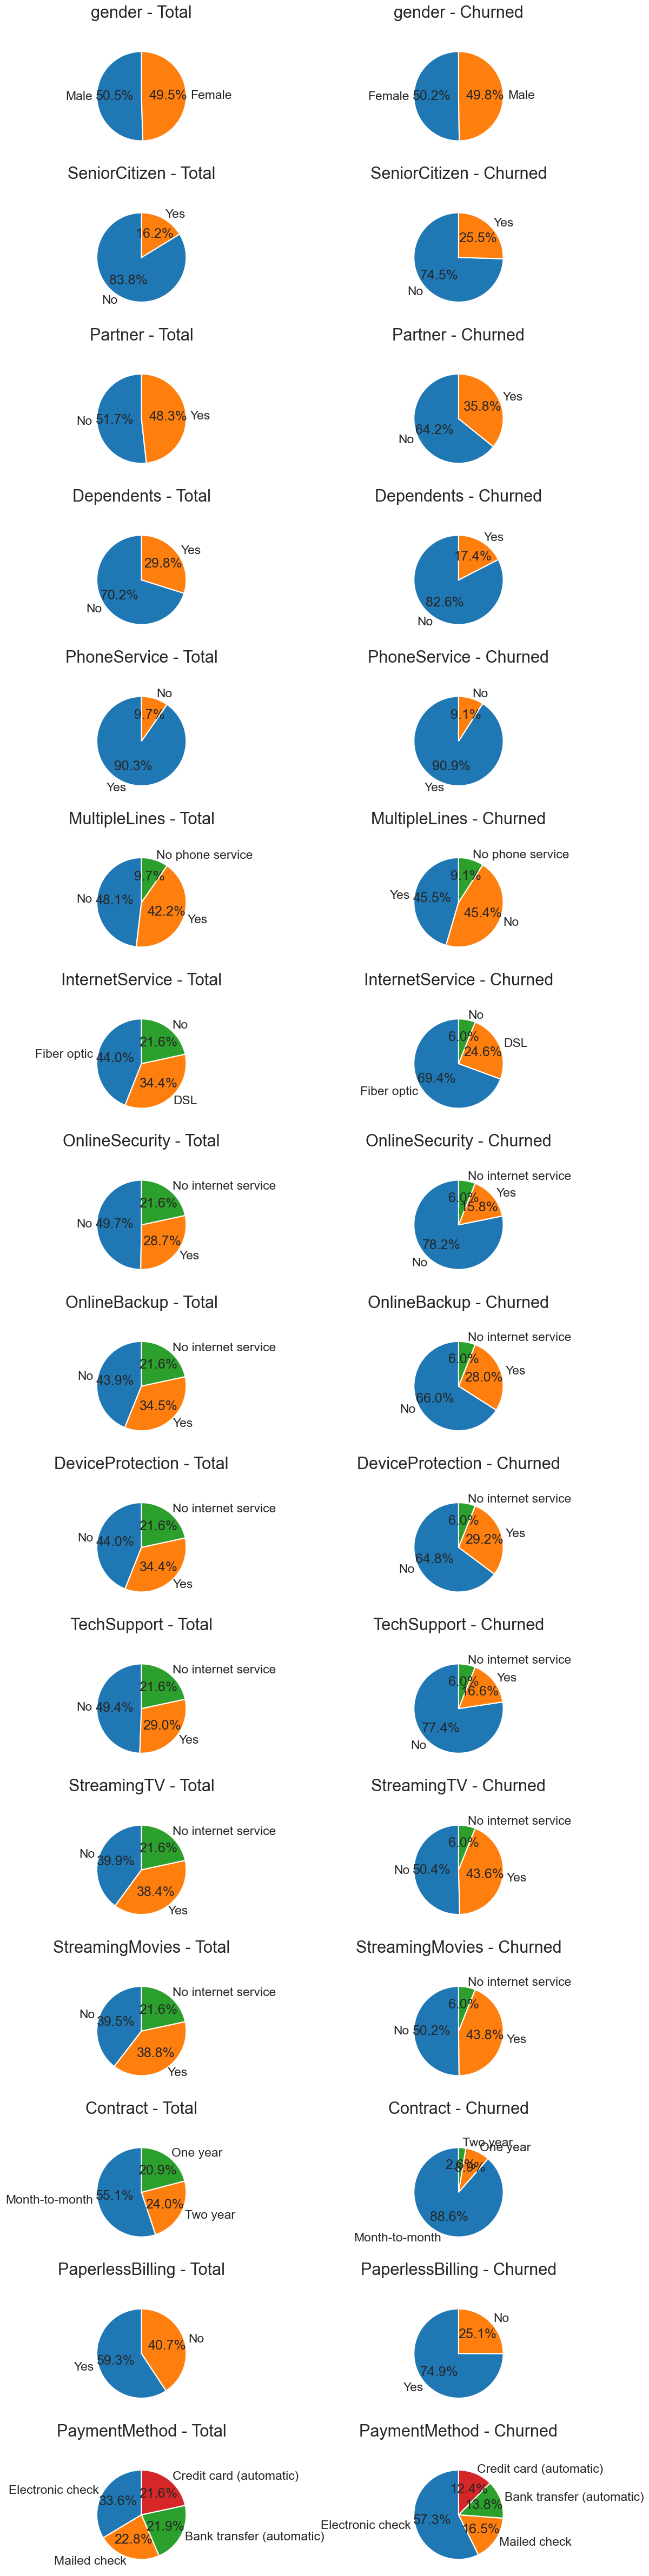

In [96]:

n_cols = 2
n_rows = len(categorical_columns)

plt.figure(figsize=(12, n_rows * 3))

plot_no = 1

for col in categorical_columns:
    total = df[col].value_counts()
    churned = churn_df[col].value_counts()

    # Pie chart for total
    plt.subplot(n_rows, n_cols, plot_no)
    plt.pie(total.values, labels=total.index, autopct="%0.1f%%", startangle=90)
    plt.title(f'{col} - Total')
    plot_no += 1

    # Pie chart for churned
    plt.subplot(n_rows, n_cols, plot_no)
    plt.pie(churned.values, labels=churned.index, autopct="%0.1f%%", startangle=90)
    plt.title(f'{col} - Churned')
    plot_no += 1

plt.tight_layout()
plt.show()


***Conclusion***  

**online sequirity**- The person having "No" are more prone to churn

**online backup** - The person having "no" are more prone to churn

**payment Method** - The person having "Electronic Check" are more prone to churn

**paperless billing** - The person having "yes" are more prone to churn

**contract** - The person having "month  by month" are more prone to churn

**Tech support** - The person having "no" are more prone to churn

**Device Protection** - The person having "no" are more prone to churn

**Intenet Service**  - The person having "fibre optics" are more prone to churn

**Partner** - The person having "no" more prone to churn 

**Dependents** - The person having "no" more prone to churn 





<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

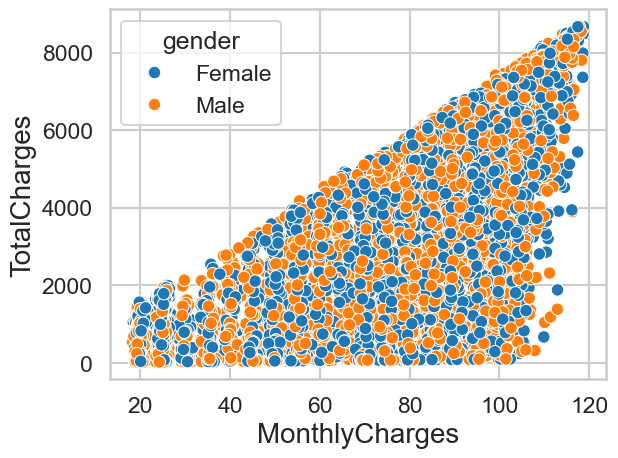

In [97]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='gender')

Text(0.5, 1.0, 'Monthly charges by churn')

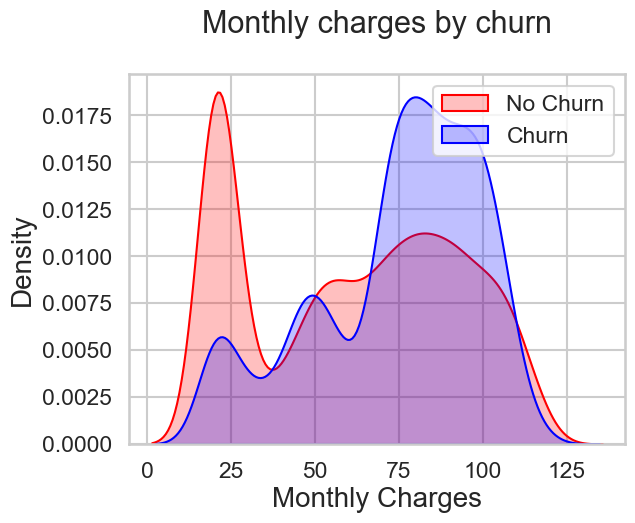

In [98]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", fill= True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


Insight: Churn is high when Monthly Charges ar high

In [99]:
# # Get the max tenure
# print(df['tenure'].max()) #72
# # Group the tenure in bins of 12 months
# labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [100]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']  # No spaces!

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)


In [101]:
#drop column  tenure
df.drop(columns= ['tenure'], axis=1, inplace=True)

Churn dtype: int64


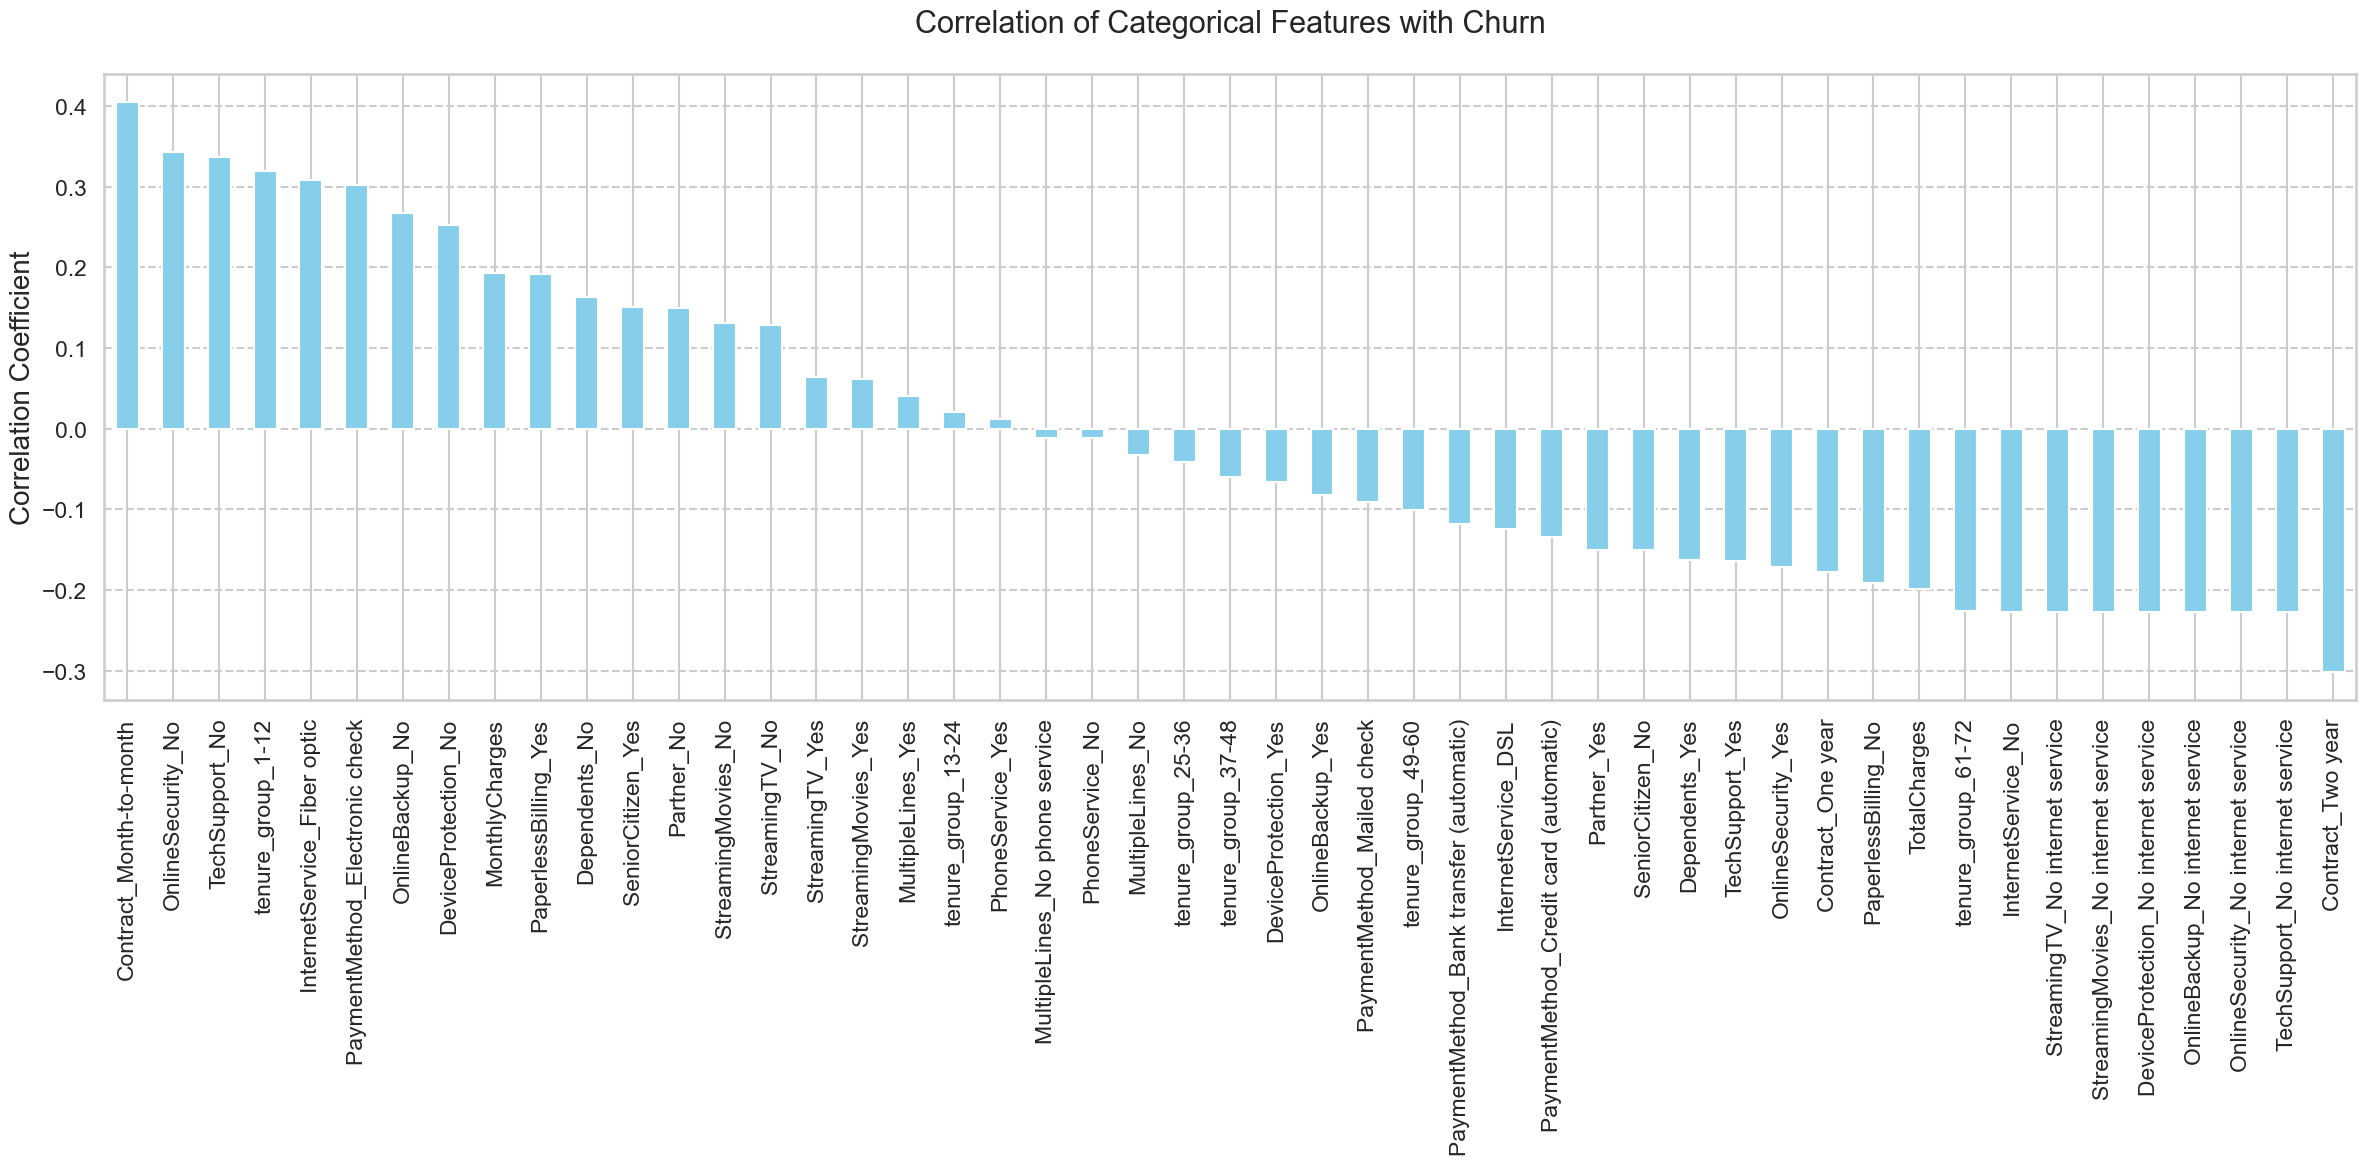

In [102]:


# Step 1: Copy the dataset
df1 = df.copy()

# ✅ Step 2: Convert 'Churn' to 0/1
df1['Churn'] = df1['Churn'].map({'No': 0, 'Yes': 1})

# ✅ Step 3: One-hot encode all categorical variables (including gender, contract, etc.)
df_encoded = pd.get_dummies(df1, drop_first=False)

# ✅ Step 4: Confirm Churn is now numeric
print("Churn dtype:", df_encoded['Churn'].dtype)  # Should print int64

# ✅ Step 5: Compute correlation with Churn
corr_matrix = df_encoded.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

# ✅ Step 6: Optional filter to remove near-zero values
churn_corr_filtered = churn_corr[abs(churn_corr) > 0.01]
if churn_corr_filtered.empty:
    print("⚠️ All correlations are very small — showing everything.")
    churn_corr_filtered = churn_corr

# ✅ Step 7: Plot
plt.figure(figsize=(24, 12))
churn_corr_filtered.plot(kind='bar', color='skyblue')
plt.title('Correlation of Categorical Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

In [103]:
df_churned=df.loc[df["Churn"]=='Yes']
df_churned

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
5,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1-12
8,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36
13,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,No,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1-12
7026,Female,No,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1-12
7032,Male,Yes,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1-12
7034,Female,No,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,61-72


In [104]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 5)
    plt.xticks(rotation=45)
    
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

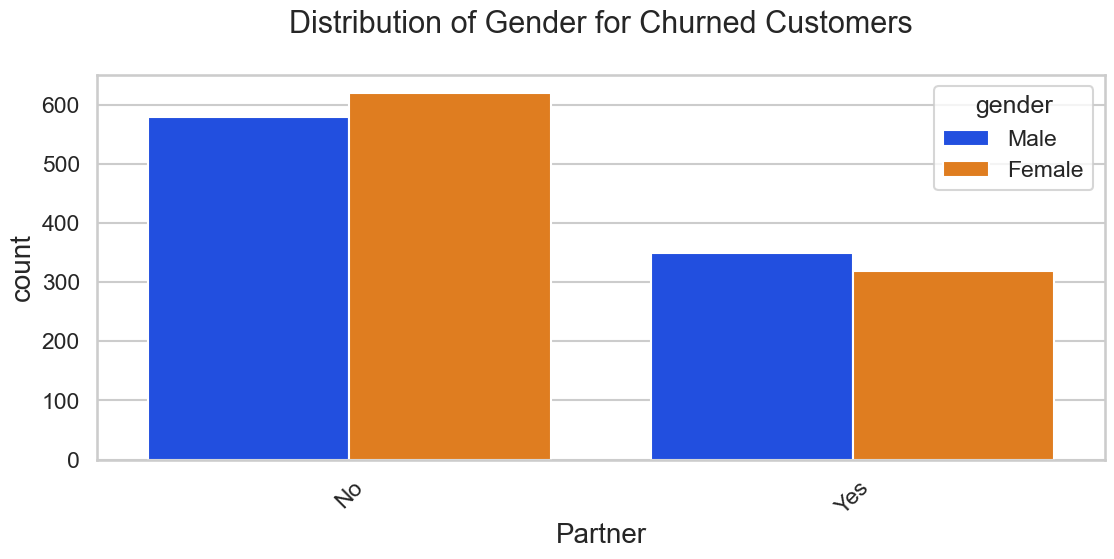

In [105]:
uniplot(df_churned,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

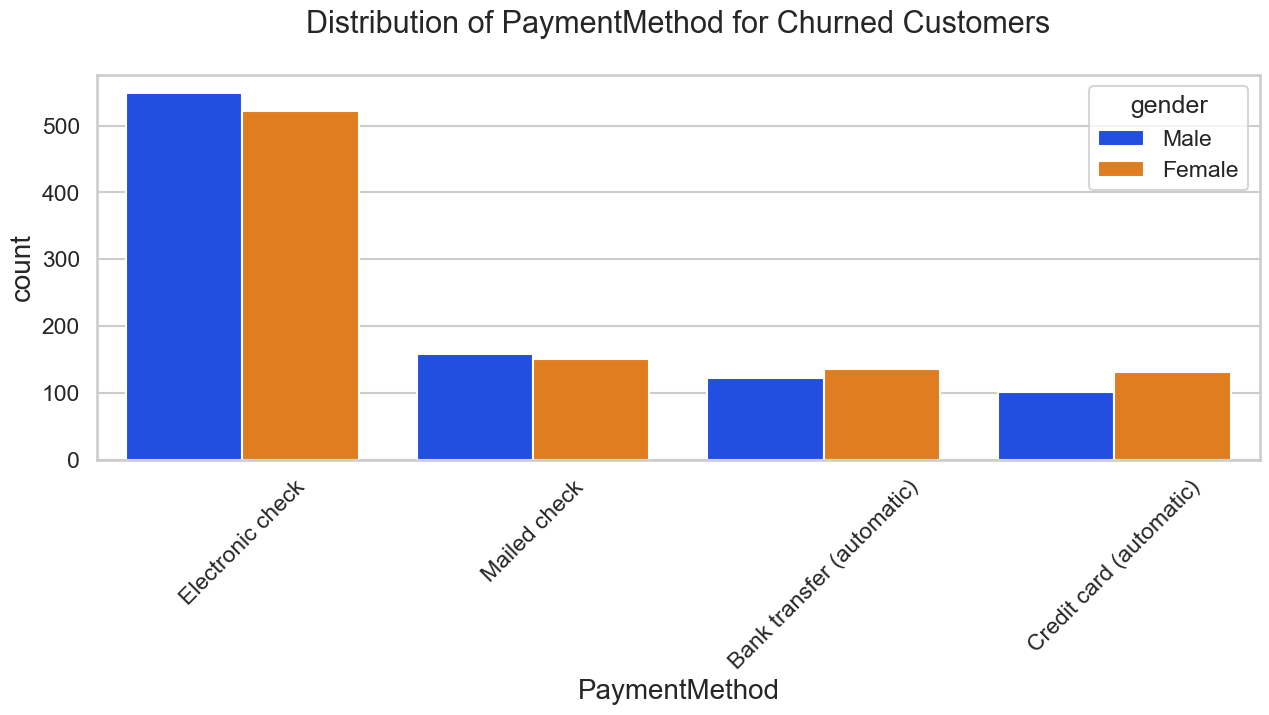

In [106]:


uniplot(df_churned,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

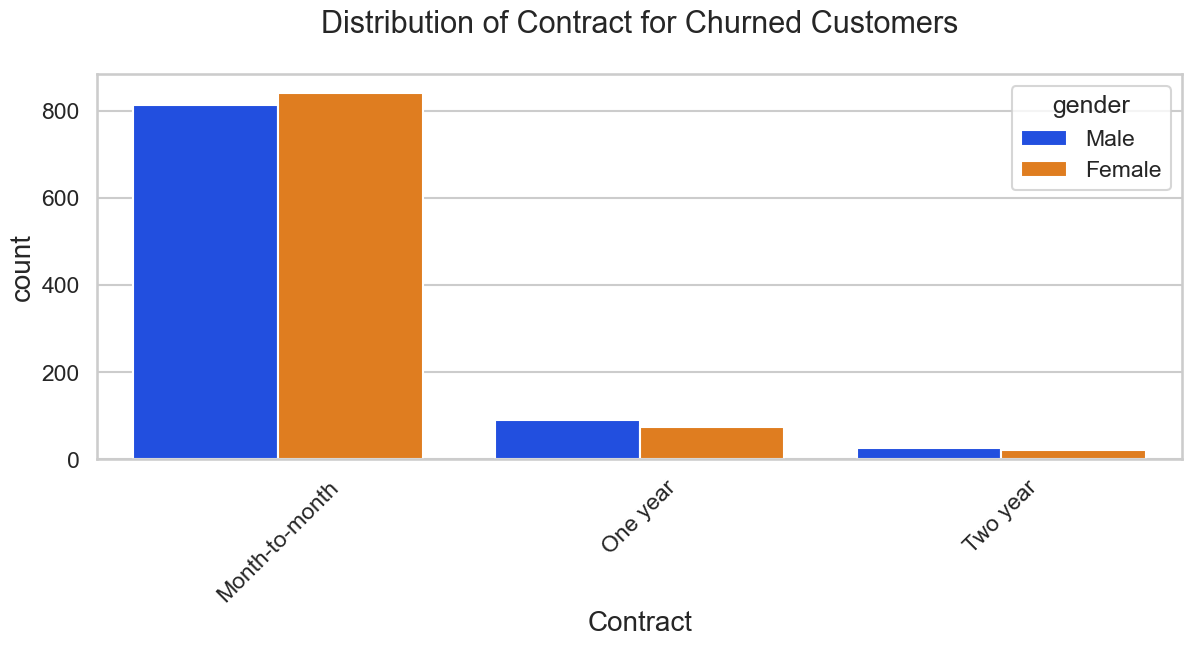

In [107]:
uniplot(df_churned,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

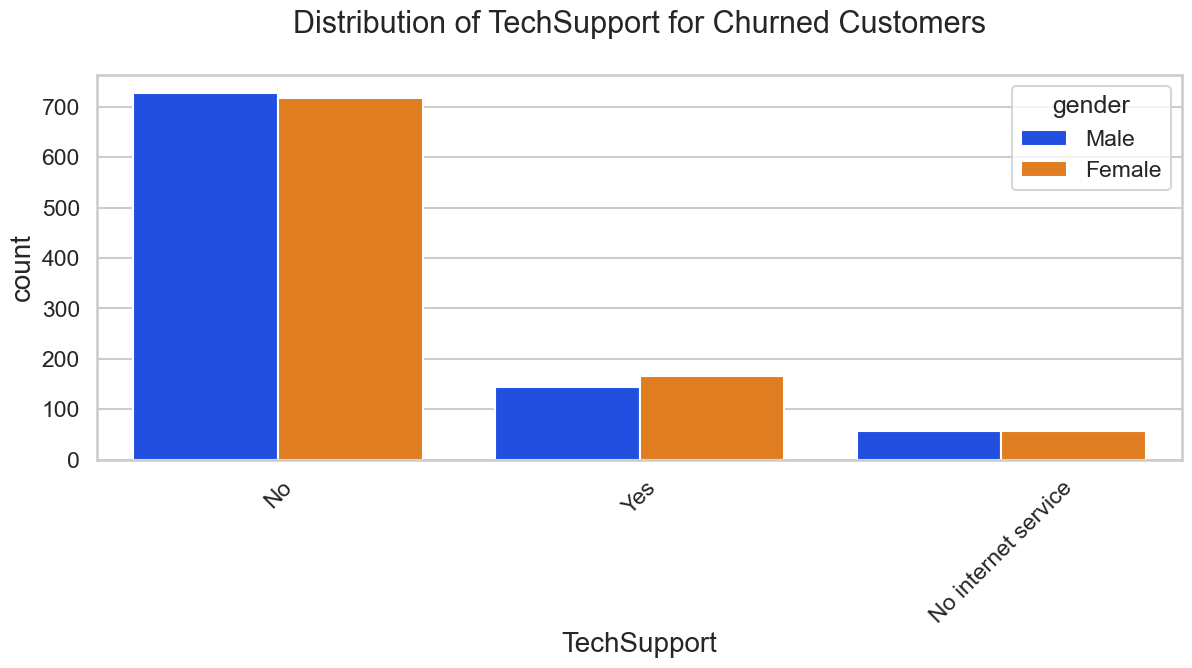

In [108]:
uniplot(df_churned,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

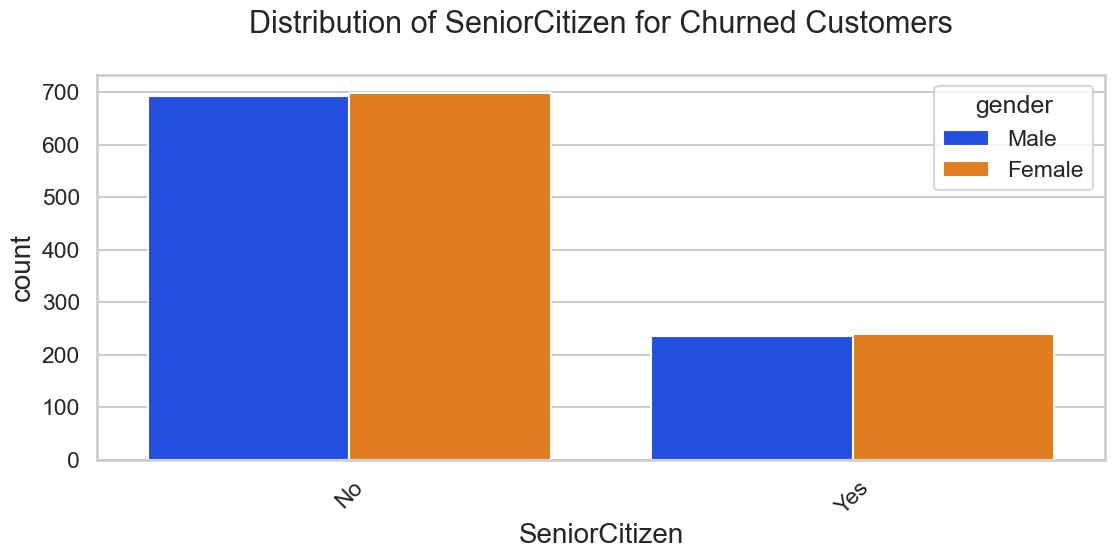

In [109]:
uniplot(df_churned,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [110]:
df.to_csv('tel_churn.csv')